In [65]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

import h5py


from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
symmetrizeArray(np.asarray([2,1,2,3,7,8]),-1)

array([-8, -7, -3, -2, -1,  2,  1,  2,  3,  7,  8])

# Broken phase

$z=-2, \chi=5$

In [7]:
data1 = ConfResults(fn="../data/zminus2_N048_m-0501265_h003684_c00500.h5",thTime=400,dt=0.8, decim=1, data_format="old")
dt=0.8

Magnetization, check we are thermalized

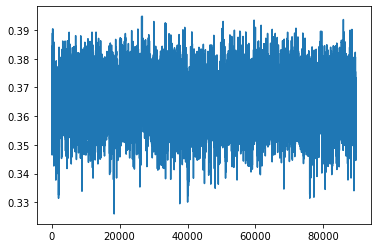

In [26]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
plt.show()

Compute $\langle j_A(t) j_A(0)\rangle$ correlator and Fourier transform.

In [20]:
#tMax is maximum distance in time (time units), blockSize is the size of one block  (time units). Error function is 
# to compute the error. For now, can basically choose between bootstrap and jackknife. 
data1.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

<ErrorbarContainer object of 3 artists>

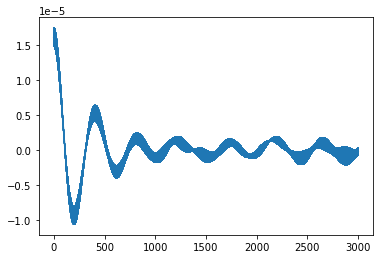

In [22]:
plt.errorbar(data1.OtOttp_time["A"], data1.OtOttp_mean["A"],data1.OtOttp_err["A"])

In [81]:
# filterFunc is the filter to be applied to the fourrier transform, to kill a bit of the noise at late time.
data1.computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))

#TODO: compute half of it and symmetrize.

<ErrorbarContainer object of 3 artists>

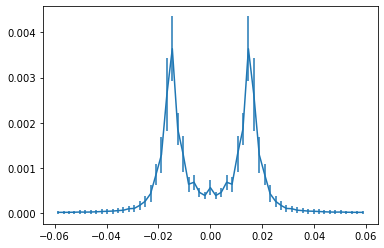

In [82]:
plt.errorbar(data1.OtOttpSpecFunc_oms["A"], data1.OtOttpSpecFunc_mean["A"], data1.OtOttpSpecFunc_err["A"])

We compare here the results obtained from evolver 8.

In [10]:
data2 = ConfResults(fn="../data/zminus2_N048_m-0501265_h003684_c00500_ev8.h5",thTime=400,dt=0.8, decim=1, data_format="new")
dt=0.8

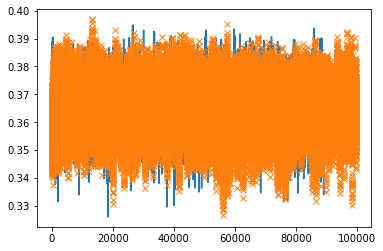

In [28]:
data2.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
t=np.arange(len(data2.phi)) * dt
plt.plot(t[:],data2.phi[:,0],'x')
plt.show()

In [33]:
data2.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,50))

<ErrorbarContainer object of 3 artists>

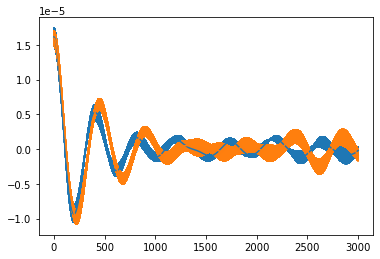

In [34]:
plt.errorbar(data1.OtOttp_time["A"], data1.OtOttp_mean["A"],data1.OtOttp_err["A"])
plt.errorbar(data2.OtOttp_time["A"], data2.OtOttp_mean["A"],data2.OtOttp_err["A"])

In [83]:
data2.computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))


<ErrorbarContainer object of 3 artists>

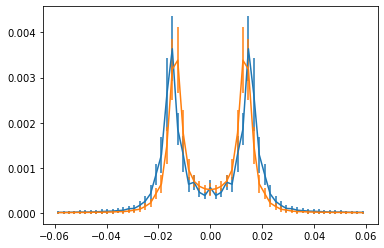

In [84]:
plt.errorbar(data1.OtOttpSpecFunc_oms["A"], data1.OtOttpSpecFunc_mean["A"], data1.OtOttpSpecFunc_err["A"])
plt.errorbar(data2.OtOttpSpecFunc_oms["A"], data2.OtOttpSpecFunc_mean["A"], data2.OtOttpSpecFunc_err["A"])

In [44]:
data2.computeOtOtpBlocked("phi",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

<ErrorbarContainer object of 3 artists>

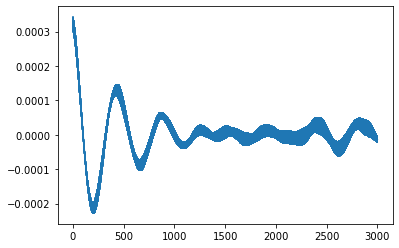

In [52]:
plt.errorbar(data2.OtOttp_time["phi"], data2.OtOttp_mean["phi"],data2.OtOttp_err["phi"])

In [106]:
data2.computeStatCor("phi", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2500.0))


(-0.01, 0.08)

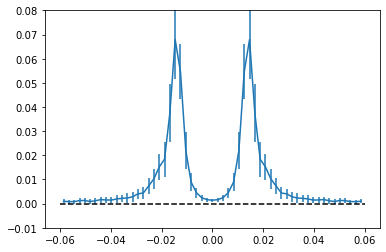

In [107]:
plt.errorbar(data2.OtOttpSpecFunc_oms["phi"], data2.OtOttpSpecFunc_mean["phi"], data2.OtOttpSpecFunc_err["phi"])
plt.plot([-0.06,0.06],[0,0],'--k')
plt.ylim([-0.01,0.08])

# Unbroken phase

In [59]:
data3 = ConfResults(fn="../data/zplus_N048_m-0445648_h003684_c00500.h5",thTime=400,dt=0.8, decim=1, data_format="old")
dt=0.8

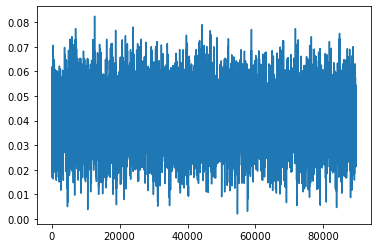

In [54]:
data3.readAv()
dt = 0.8
t=np.arange(len(data3.phi)) * dt
plt.figure(1)
plt.plot(t[:],data3.phi[:,0])
plt.show()

In [60]:
data3.computeOtOtpBlocked("A",tMax = 5000.0, blockSizeT = 8000.0,  errFunc = lambda x : bootstrap(x,10))

<ErrorbarContainer object of 3 artists>

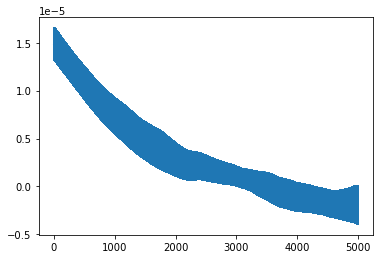

In [61]:
plt.errorbar(data3.OtOttp_time["A"], data3.OtOttp_mean["A"],data3.OtOttp_err["A"])


In [86]:
data3.computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 4000.0))


<ErrorbarContainer object of 3 artists>

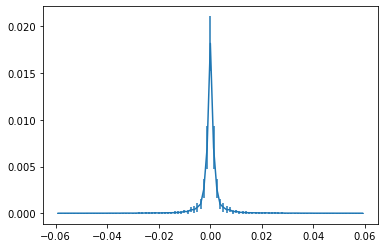

In [87]:
plt.errorbar(data3.OtOttpSpecFunc_oms["A"], data3.OtOttpSpecFunc_mean["A"], data3.OtOttpSpecFunc_err["A"])

# Dead code

Old, deprecated primitive fitting, to be improved.

In [119]:
oms, res, resErr = toFourierBlocked(ttest, dt, 0.06, lambda x: jackknife(x,3), M=1.0/2000.0)
oms2, res2, resErr2 = toFourierBlocked(ttest, dt, 0.06, lambda x: bootstrap(x,10), M=1.0/2000.0)

<ErrorbarContainer object of 3 artists>

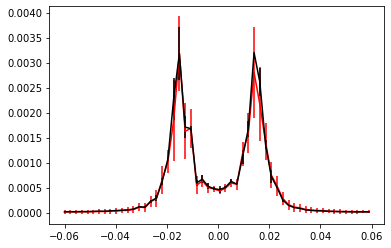

In [121]:
#plt.errorbar(oms,res,resErr)
plt.errorbar(oms2,res2,resErr2,color='r')
plt.errorbar(oms,res,resErr,color='k')

#plt.plot(oms,res,'kx')
#plt.fill_between(oms,res-resErr,res+resErr)
#plt.yscale('log')


In [633]:
def AnPoleMass(m0, H, chi):
    return (m0* H / chi)**0.5

AnPoleMass(0.365,  0.003684, 5.0)

0.016399146319244794

In [497]:
def BW(x, a,m,c):
    return  (a / ((-(x)**2 + m**2)**2 + c * (x)**2 )  )

def sBW(x, a,m,c):
    return  a / ((-x + m)**2 + c  )  

def doubleBW(x,a,b,c):
    return sBW(x,a,b,c) + sBW(-x,a,b,c)

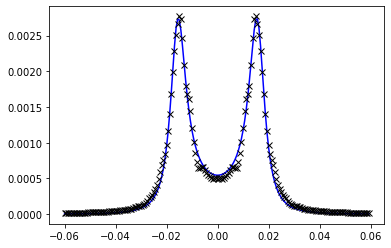

In [536]:

plt.figure(0)
res, cov = curve_fit(doubleBW, oms,np.real(resA),[0.00000003,mp,0.00001])
#plt.plot(oms, doubleBW(oms,res[0],res[1],res[2]),'r')

res2, cov2 = curve_fit(BW, oms,np.real(resA),[0.0003*res[0],res[1],res[2]])

plt.plot(oms, BW(oms,res2[0],res2[1],res2[2]),'b')

plt.plot(oms,np.real(resA),'kx')

In [14]:
test = h5py.File("../data/zminus2_N048_m-0501265_h003684_c00500_ev8.h5",'r')

In [15]:
test.keys()

<KeysViewHDF5 ['corrx', 'phi']>

In [21]:
res=np.asarray(test["phi"])

In [23]:
np.shape(res)

(125000, 13)